# Dimensionalidade

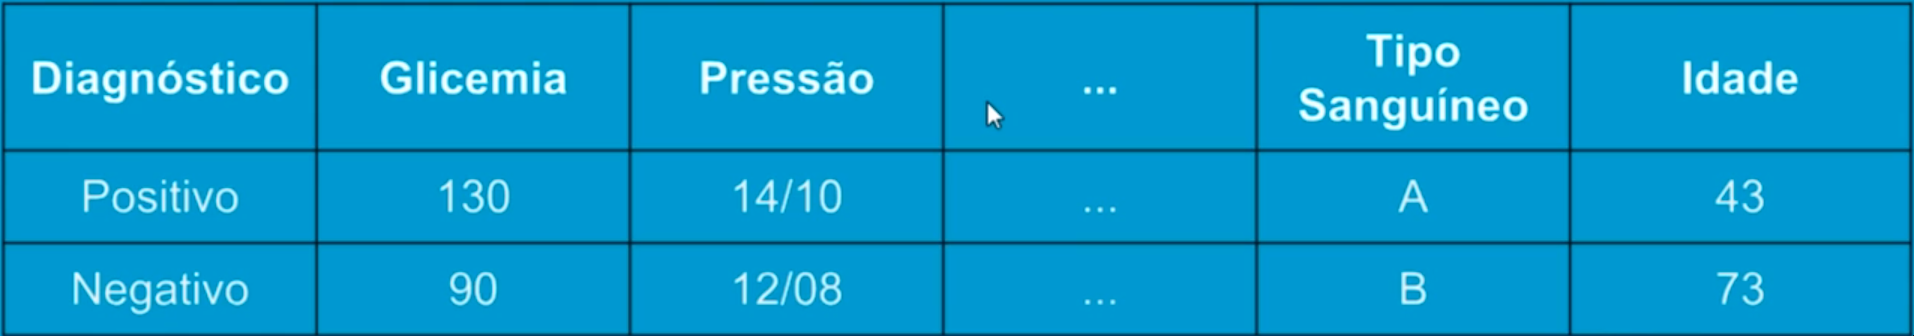
Cada característica representa uma dimensão.

**Por que diminuir o numero de dimensões?**
- Para os algoritmos de Machine Learning, quanto maior o número de dimensões, mais lento é o processo e mais espaço de armazenamento é necessário. Além disso, a alta dimensionalidade pode superajustar os nossos modelos aos dados do treinamento.


## DATASET
- Diagnostico:
    - M: Maligno
    - B: Benigno

In [2]:
import pandas as pd

resultado_exames = pd.read_csv('exames.csv')
resultado_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
resultado_exames.shape

(569, 35)

# Segregação base treino/teste

In [7]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)


valores_exames = resultado_exames.drop(columns = ['id', 'diagnostico'], axis=1)
diagnostico = resultado_exames['diagnostico']


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)
print(f'treino_x: {treino_x.shape} | teste_x: {teste_x.shape} | treino_y: {treino_y.shape} | teste_y: {teste_y.shape} ')

treino_x: (426, 33) | teste_x: (143, 33) | treino_y: (426,) | teste_y: (143,) 


# Arvore de Decisão para modelo de classificação

In [11]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(X=treino_x, y=treino_y)
classificador.score(X=teste_x, y=teste_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Encontrando o campos com NAN

In [13]:
resultado_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [18]:
resultado_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

Como a coluna **exame_33** possui um alto valor de NaN (~75%), foi escolhido realizar o drop desta coluna.

# Com dataset Corrigido

In [23]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)


valores_exames = resultado_exames.drop(columns = ['id', 'diagnostico'], axis=1)
diagnostico = resultado_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns = ['exame_33'], axis=1)


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = .3)
print(f'treino_x: {treino_x.shape} | teste_x: {teste_x.shape} | treino_y: {treino_y.shape} | teste_y: {teste_y.shape} ')

treino_x: (398, 32) | teste_x: (171, 32) | treino_y: (398,) | teste_y: (171,) 


In [26]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
%time classificador.fit(X=treino_x, y=treino_y)
acuracia = classificador.score(X=teste_x, y=teste_y) * 100
print(f'Resultado da classificação: {acuracia:.2f}%')

Wall time: 153 ms
Resultado da classificação: 91.81%


# Verificando o classificador escolhido

E verificado o resultado de predição de um **baseline**. Verifica-se que o classificador anterior parece ser uma boa escolha.

In [28]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy="most_frequent")
%time classificador_dummy.fit(X=treino_x, y=treino_y)
acuracia = classificador_dummy.score(X=teste_x, y=teste_y) * 100
print(f'Resultado da classificação do classificador_dummy: {acuracia:.2f}%')

Wall time: 993 µs
Resultado da classificação do classificador_dummy: 66.67%


# Visualizando os dados para entender as dimensões

In [42]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [44]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


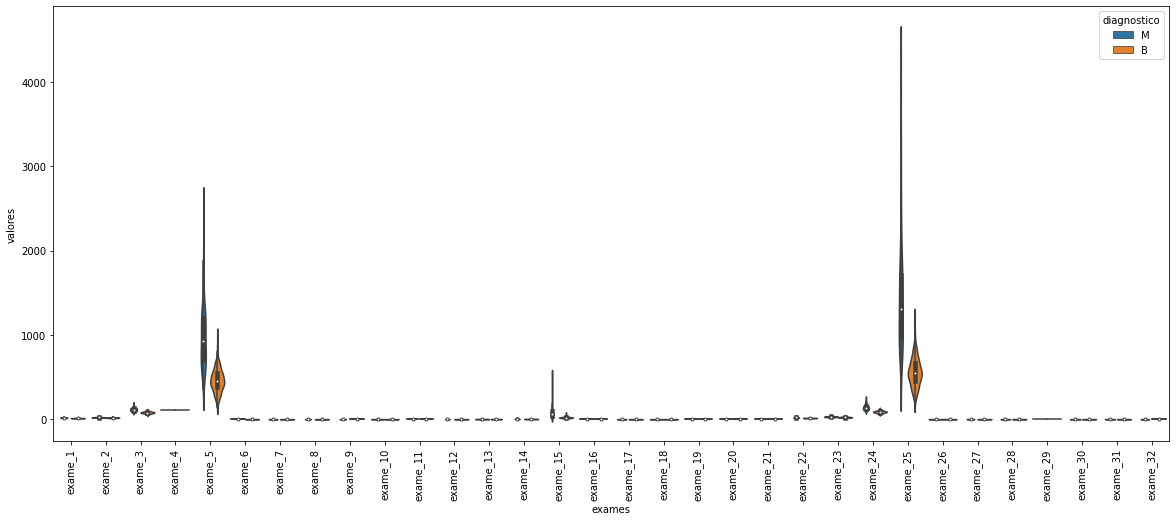

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
sns.violinplot(x='exames', y='valores', data=dados_plot, hue='diagnostico');

Melhorando a visualização do grafico. Padronizar o eixo y

In [54]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Observe que a saida foi um Array Numpy. Antes fornecia um pandas.

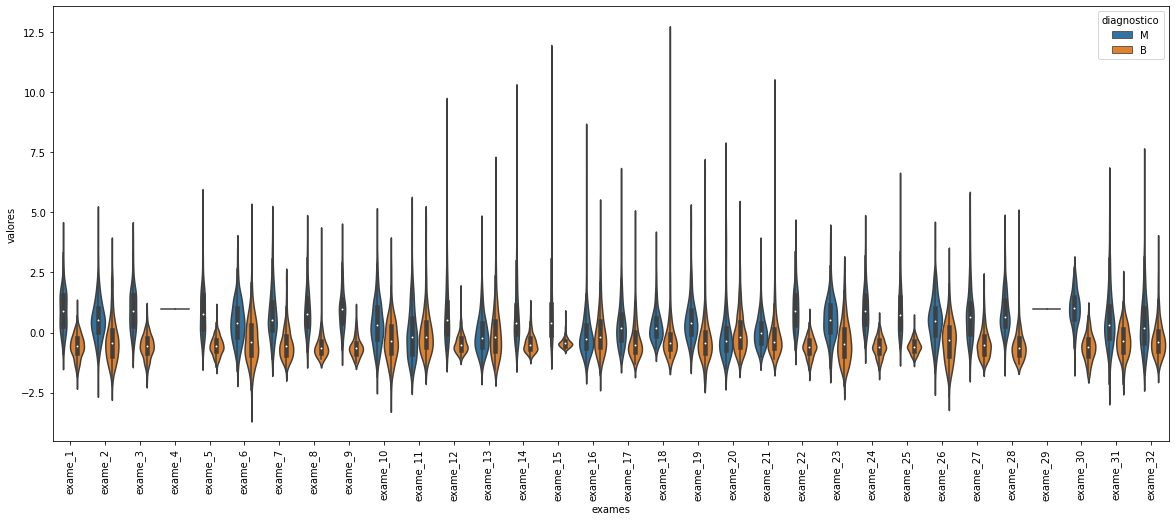

In [56]:
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())


dados_plot = pd.concat([diagnostico, valores_exames_v2], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
sns.violinplot(x='exames', y='valores', data=dados_plot, hue='diagnostico');

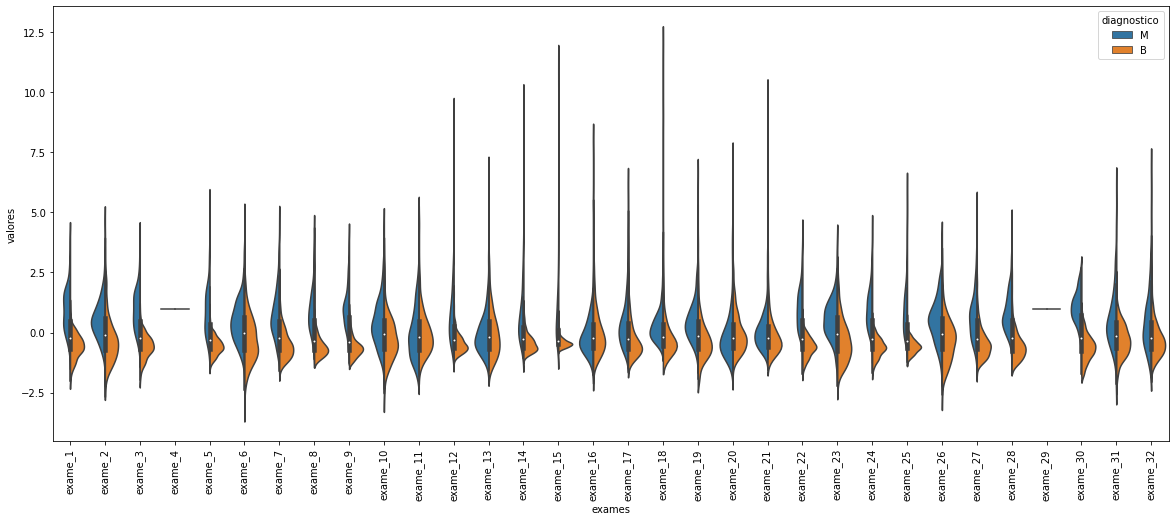

In [57]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
sns.violinplot(x='exames', y='valores', data=dados_plot, hue='diagnostico', split=True);

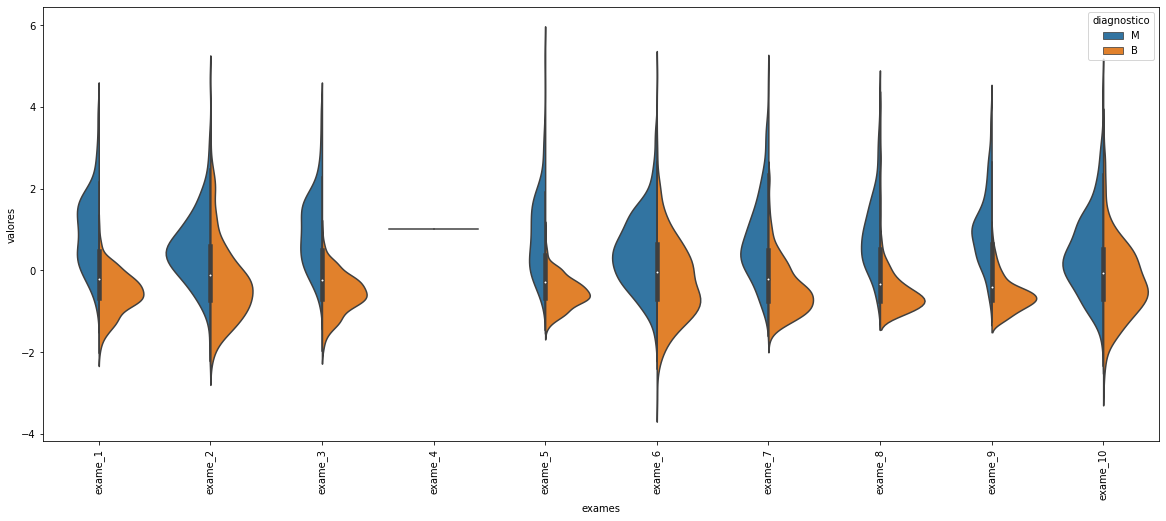

In [61]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(20,8))
    plt.xticks(rotation = 90)
    sns.violinplot(x='exames', y='valores', data=dados_plot, hue='diagnostico', split=True);
    
grafico_violino(valores_exames_v2, 0, 10)

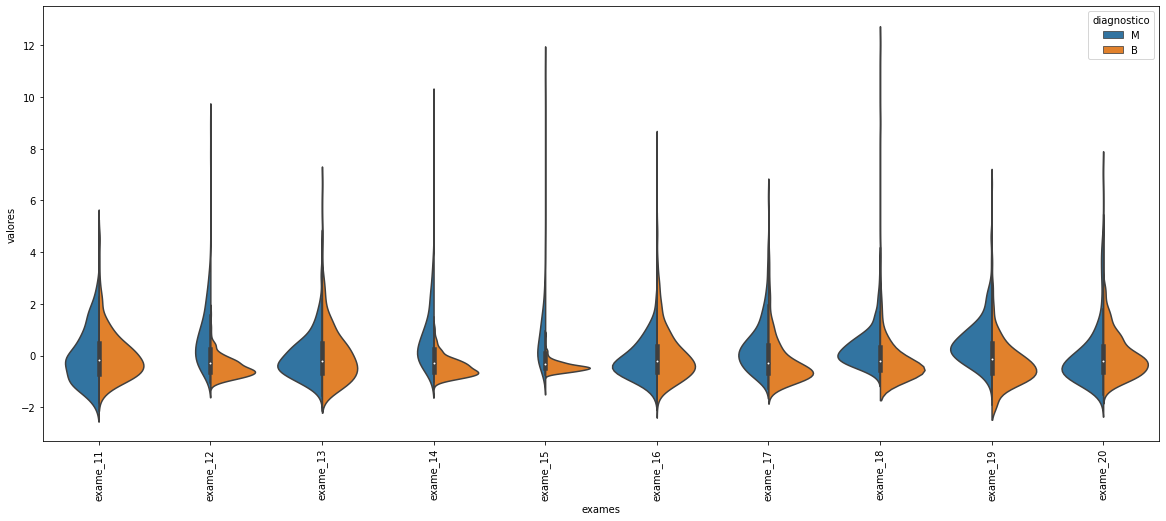

In [63]:
grafico_violino(valores_exames_v2, 10, 20)

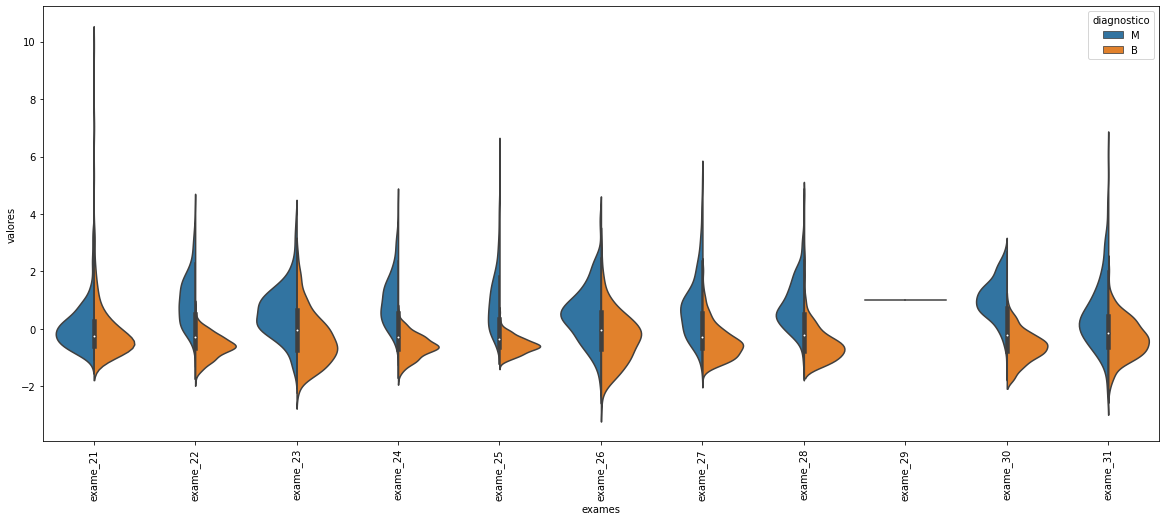

In [64]:
grafico_violino(valores_exames_v2, 20, -1)

# Avaliação

- Exame_1: bem definido o Maligno e Benigno
- Exame_4 e Exame_29: Valores constante. Pode ser removido


# Limpando 1

In [65]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29','exame_4'])

In [67]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = .3)
    classificador = RandomForestClassifier(n_estimators = 100)
    %time classificador.fit(X=treino_x, y=treino_y)
    acuracia = classificador.score(X=teste_x, y=teste_y) * 100
    print(f'Resultado da classificação: {acuracia:.2f}%')

In [68]:
classificar(valores_exames_v3)

Wall time: 205 ms
Resultado da classificação: 92.98%


# Correlação entre todas as variaveis

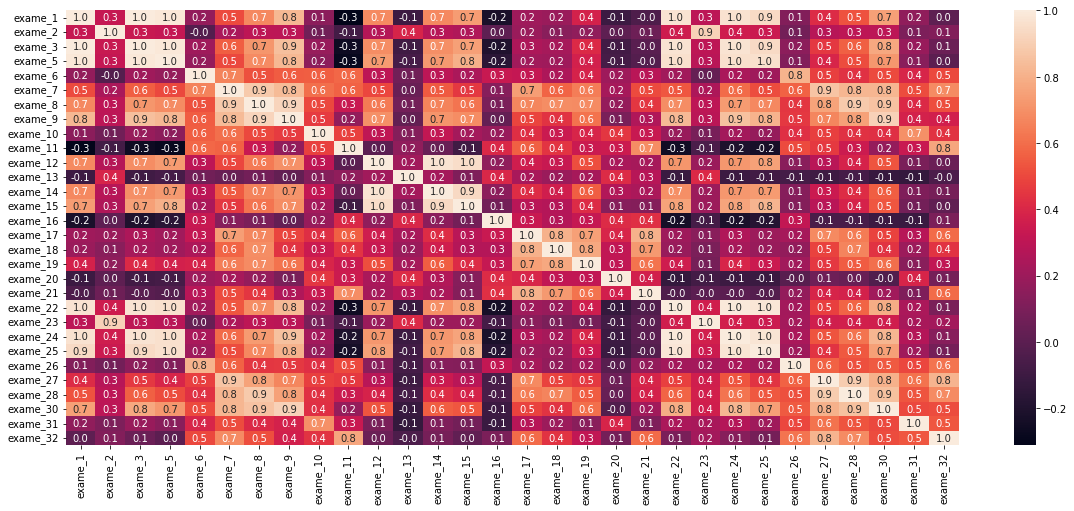

In [74]:
matrix_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(20,8))
sns.heatmap(matrix_correlacao, annot = True, fmt=".1f");

In [77]:
#Correlação quase perfeita
matrix_correlacao_v1 = matrix_correlacao[matrix_correlacao>0.99]
matrix_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
matrix_correlacao_v2 = matrix_correlacao_v1.sum()
matrix_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Encontrei as variaveis que possuem relação

In [87]:
variaveis_altamente_correlacionadas = matrix_correlacao_v2[matrix_correlacao_v2>1]
variaveis_altamente_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [127]:
print('sem limpeza')
classificar(valores_exames_v3)

sem limpeza
Wall time: 169 ms
Resultado da classificação: 92.98%


In [128]:
# Note que o resultado caiu. Significa que removi muita coluna. TAlvez o correlacionamento não seja entre todas elas.
print(variaveis_altamente_correlacionadas.keys())
classificar(valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys()))

Index(['exame_1', 'exame_3', 'exame_22', 'exame_24'], dtype='object')
Wall time: 160 ms
Resultado da classificação: 91.81%


In [129]:
print(variaveis_altamente_correlacionadas.keys()[1:])
classificar(valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys()[1:]))

Index(['exame_3', 'exame_22', 'exame_24'], dtype='object')
Wall time: 168 ms
Resultado da classificação: 92.98%


In [130]:
print(variaveis_altamente_correlacionadas.keys()[1:3])
classificar(valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys()[1:3]))

Index(['exame_3', 'exame_22'], dtype='object')
Wall time: 165 ms
Resultado da classificação: 93.57%


In [131]:
print(variaveis_altamente_correlacionadas.keys()[0:2])
classificar(valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys()[0:2]))

Index(['exame_1', 'exame_3'], dtype='object')
Wall time: 160 ms
Resultado da classificação: 92.40%


In [132]:
print(variaveis_altamente_correlacionadas.keys()[-1:])
classificar(valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys()[-1:]))

Index(['exame_24'], dtype='object')
Wall time: 166 ms
Resultado da classificação: 94.15%


In [137]:
print(variaveis_altamente_correlacionadas.keys()[2:])
classificar(valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys()[2:]))

Index(['exame_22', 'exame_24'], dtype='object')
Wall time: 163 ms
Resultado da classificação: 92.40%


# Correlação e Causalidade
https://www.tylervigen.com/spurious-correlations

**Tomar cuidado**. Precisa avaliar se há uma relação de causalidade. Há variáveis que possuem alta correlação, mas na prática não

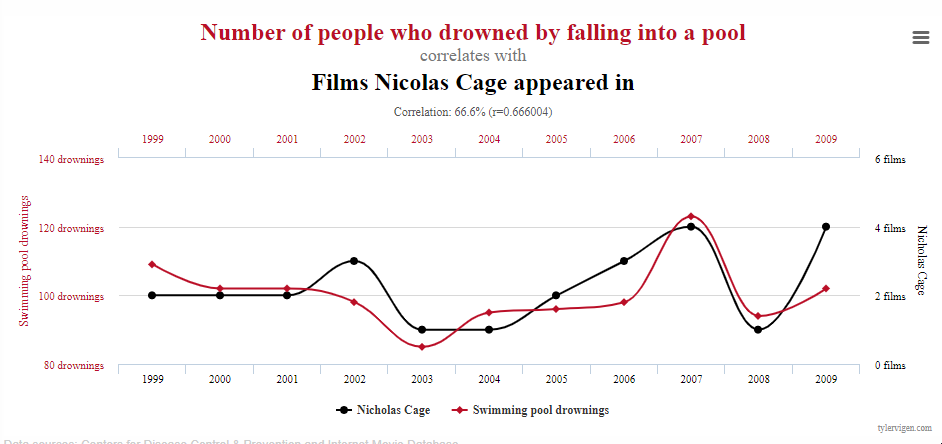